In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiard_halfClass as bc
from src import wavefunctions as wf
from src import curveClass as cv
from src import plottingFunctions as pf
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [3]:
def Robnik_r(t, lam = 0):
    phi = t * np.pi
    x = np.cos(phi) * (1 + 2*lam * np.cos(phi))
    y = np.sin(phi) * (1 + 2*lam * np.cos(phi))
    return x, y

def Robnik_n(t, lam = 0):
    phi = t * np.pi
    #tangent
    tx = -np.sin(phi) - 2*lam*np.sin(2*phi)
    ty = np.cos(phi) + 2*lam*np.cos(2*phi)
    norm = np.sqrt(tx**2+ty**2)
    return ty/norm, -tx/norm

def Robnik_arc(t, lam = 0):
    phi = t * np.pi
    a = lam * 2
    return 2*(1+a)*special.ellipeinc(phi/2,4*a/(1+a)**2 )

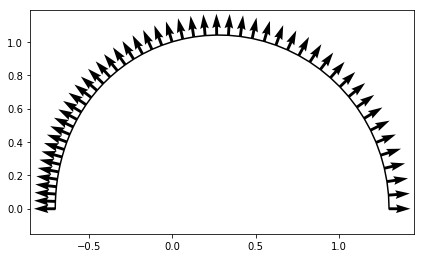

In [4]:
lam = 0.15
params_1 = {"lam" : lam}
area = 0.5 * (1 + 2 * lam * lam) * m.pi
Robnik = cv.curve(Robnik_r, Robnik_n, Robnik_arc, **params_1)
curves = [Robnik]
dens = [10 for i in curves]
RobnikBilliard = bc.billiard_half(curves, area, point_densities= dens)
RobnikBilliard.plot_boundary(M =5)

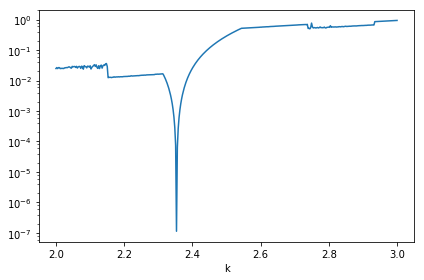

In [5]:
k1 = 2.0
k2 = 3.0
sym = 0
RobnikBilliard.plot_tension( k1, k2, sym, N = 200, grid = 400)

In [7]:
k0 = 2.35
dk = 0.05
N = 200
PWDresult = RobnikBilliard.PWD_eigenvalue(N, k0, dk, sym)
print(PWDresult)

     fun: 4.2190641102607085e-05
 message: 'Solution found.'
    nfev: 21
  status: 0
 success: True
       x: 2.347381619061133


In [8]:
k0 = 2.35
dk = 0.05
N = 200
sym = 0
VSresult = RobnikBilliard.scaling_eigenvalues(N, k0, dk, sym)
print(VSresult)

[ 2.35348203]


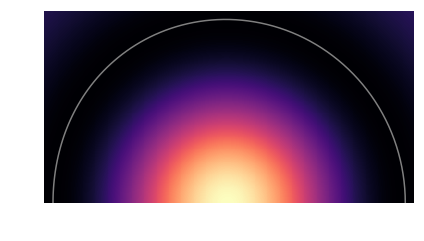

In [9]:
RobnikBilliard.plot_probability( VSresult[0], sym)

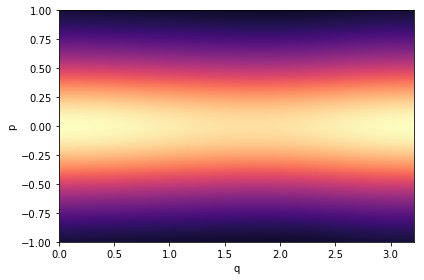

In [21]:
RobnikBilliard.plot_Husimi_function( VSresult[0], sym)

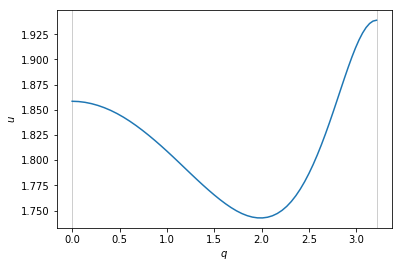

In [13]:
RobnikBilliard.plot_boundary_function(PWDresult.x, sym, delta = 5, plot_curve_bounds = True)